<a href="https://colab.research.google.com/github/sinan-894/git_test/blob/main/better_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/jordan-bird/CIFAKE-Real-and-AI-Generated-Synthetic-Images.git
%ls

Cloning into 'CIFAKE-Real-and-AI-Generated-Synthetic-Images'...
remote: Enumerating objects: 118694, done.
remote: Counting objects: 100% (118694/118694), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 118694 (delta 118651), reused 118673 (delta 118645), pack-reused 0 (from 0)
Receiving objects: 100% (118694/118694), 39.68 MiB | 48.90 MiB/s, done.
Resolving deltas: 100% (118651/118651), done.
Updating files: 100% (120001/120001), done.
CIFAKE-Real-and-AI-Generated-Synthetic-Images/  sample_data/


In [3]:
import numpy as np
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.preprocessing import LabelEncoder , OneHotEncoder


PATH_CURRENT = '/content/CIFAKE-Real-and-AI-Generated-Synthetic-Images/DATASET/train'



dataset_path = os.listdir(PATH_CURRENT)

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

class_labels = []

for item in dataset_path:
 # Get all the file names
    all_classes = os.listdir(PATH_CURRENT + '/' +item)
 #print(all_classes)

 # Add them to the list
    for room in all_classes:
        class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))

df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

path = PATH_CURRENT + '/'
dataset_path = os.listdir(PATH_CURRENT)

im_size = 32

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

images = np.array(images)

images = images.astype('float32') / 255.0



y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)

y=y.reshape(-1,1)

['REAL', 'FAKE']
Types of classes labels found:  2
Total number of images in the dataset:  100000
Labels
REAL    50000
FAKE    50000
Name: count, dtype: int64
['REAL' 'REAL' 'REAL' ... 'FAKE' 'FAKE' 'FAKE']


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Model Creation

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the CNN model
def create_cnn_model(input_shape=(32, 32, 3)):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        Conv2D(64, (3,3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(64, (3,3), activation='relu', padding='same'),
        Conv2D(64, (3,3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        Conv2D(128, (3,3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2)),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification (Real vs AI-generated)
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Create the model
cnn_model = create_cnn_model()

# Print model summary
cnn_model.summary()

# Assuming dataset is loaded and preprocessed as (X_train, y_train), (X_val, y_val), (X_test, y_test)
# Example training loop
# cnn_model.fit(X_train, y_train, epochs=32, batch_size=64, validation_data=(X_val, y_val))

# Example evaluation
# test_loss, test_acc = cnn_model.evaluate(X_test, y_test)
# print(f'Test Accuracy: {test_acc * 100:.2f}%')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │           4,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,499,233 (5.72 MB)

 Trainable params: 1,499,233 (5.72 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
hist_train=  cnn_model.fit(images, y, epochs=30, verbose=2)

Epoch 1/30
3125/3125 - 25s - 8ms/step - accuracy: 0.8615 - loss: 0.3142
Epoch 2/30
3125/3125 - 35s - 11ms/step - accuracy: 0.9258 - loss: 0.1913
Epoch 3/30
3125/3125 - 21s - 7ms/step - accuracy: 0.9388 - loss: 0.1607
Epoch 4/30
3125/3125 - 20s - 6ms/step - accuracy: 0.9458 - loss: 0.1417
Epoch 5/30
3125/3125 - 17s - 5ms/step - accuracy: 0.9512 - loss: 0.1286
Epoch 6/30
3125/3125 - 20s - 6ms/step - accuracy: 0.9563 - loss: 0.1164
Epoch 7/30
3125/3125 - 20s - 7ms/step - accuracy: 0.9603 - loss: 0.1052
Epoch 8/30
3125/3125 - 21s - 7ms/step - accuracy: 0.9644 - loss: 0.0947
Epoch 9/30
3125/3125 - 17s - 5ms/step - accuracy: 0.9679 - loss: 0.0856
Epoch 10/30
3125/3125 - 21s - 7ms/step - accuracy: 0.9717 - loss: 0.0752
Epoch 11/30
3125/3125 - 21s - 7ms/step - accuracy: 0.9746 - loss: 0.0673
Epoch 12/30
3125/3125 - 16s - 5ms/step - accuracy: 0.9786 - loss: 0.0577
Epoch 13/30
3125/3125 - 21s - 7ms/step - accuracy: 0.9805 - loss: 0.0524
Epoch 14/30
3125/3125 - 21s - 7ms/step - accuracy: 0.9835 -

In [11]:
cnn_model.save('cnn1_model.keras')

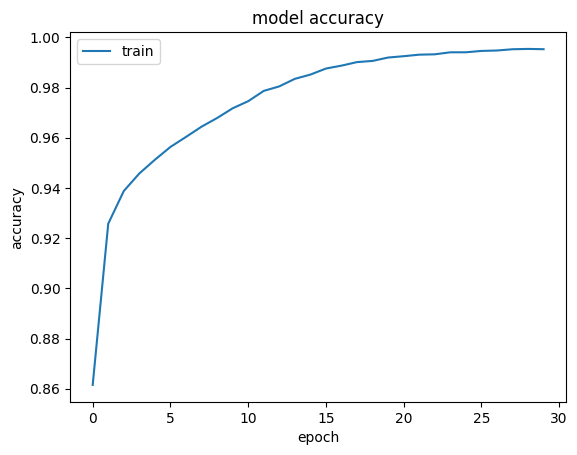

In [6]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

plot_hist(hist_train)

In [8]:
PATH_CURRENT = PATH_CURRENT = '/content/CIFAKE-Real-and-AI-Generated-Synthetic-Images/DATASET/test'



dataset_path = os.listdir(PATH_CURRENT)

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir(PATH_CURRENT + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))

df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])

print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

import cv2
path = PATH_CURRENT + '/'
dataset_path = os.listdir(PATH_CURRENT)

im_size = 32

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)
images = np.array(images)
images = images.astype('float32') / 255.0
# print(images[0])
print(images.shape)

y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)
print(y.shape)

y=y.reshape(-1,1)

['REAL', 'FAKE']
Types of classes labels found:  2
Total number of images in the dataset:  20000
Labels
REAL    10000
FAKE    10000
Name: count, dtype: int64
(20000, 32, 32, 3)
['REAL' 'REAL' 'REAL' ... 'FAKE' 'FAKE' 'FAKE']
[1 1 1 ... 0 0 0]
(20000,)


In [10]:
preds = cnn_model.evaluate(images, y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9682 - loss: 0.1523
Loss = 0.23376227915287018
Test Accuracy = 0.9542999863624573
